# GloVe: Global Vectors for Word Representation Jeffrey Pennington,  
## Richard Socher,   Christopher D. Manning

COMPRESSING WORD EMBEDDINGS VIA DEEP
COMPOSITIONAL CODE LEARNING
Raphael Shu Hideki Nakayama
The University of Tokyo
https://arxiv.org/pdf/1711.01068.pdf

In [1]:
import pandas as pd
import numpy as np

from keras import Input
from keras.layers   import Dense, Lambda, Layer, Activation
from keras.models   import Model
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import matplotlib.pyplot as plt
from keras.activations import softmax

/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_table('glove.6B/glove.6B.100d.txt', header=None,sep=' ',error_bad_lines=False,engine='python')

Skipping line 9: field larger than field limit (131072)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,the,-0.038194,-0.244870,0.728120,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.575450,...,0.016215,-0.017099,-0.389840,0.874240,-0.725690,-0.510580,-0.520280,-0.145900,0.827800,0.270620
1,",",-0.107670,0.110530,0.598120,-0.543610,0.673960,0.106630,0.038867,0.354810,0.063510,...,0.349510,-0.722600,0.375490,0.444100,-0.990590,0.612140,-0.351110,-0.831550,0.452930,0.082577
2,.,-0.339790,0.209410,0.463480,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.466190,...,-0.063351,-0.674120,-0.068895,0.536040,-0.877730,0.318020,-0.392420,-0.233940,0.472980,-0.028803
3,of,-0.152900,-0.242790,0.898370,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.358100,...,0.187120,-0.018488,-0.267570,0.727000,-0.593630,-0.348390,-0.560940,-0.591000,1.003900,0.206640
4,to,-0.189700,0.050024,0.190840,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.201350,...,-0.131340,0.058617,-0.318690,-0.614190,-0.623930,-0.415480,-0.038175,-0.398040,0.476470,-0.159830
5,and,-0.071953,0.231270,0.023731,-0.506380,0.339230,0.195900,-0.329430,0.183640,-0.180570,...,0.014487,-0.625900,-0.323670,0.418620,-1.080700,0.467420,-0.499310,-0.718950,0.868940,0.195390
6,in,0.085703,-0.222010,0.165690,0.133730,0.382390,0.354010,0.012870,0.224610,-0.438170,...,0.402150,-0.127460,-0.202280,0.873680,-0.545000,0.792050,-0.206950,-0.074273,0.758080,-0.342430
7,a,-0.270860,0.044006,-0.020260,-0.173950,0.644400,0.712130,0.355100,0.471380,-0.296370,...,0.572010,0.088945,-0.425320,-0.018253,-0.079995,-0.285810,-0.010890,-0.492300,0.636870,0.236420
8,our,-0.085462,0.114680,0.633050,-0.299490,-0.751230,-0.019007,-0.718630,-0.086716,-0.320630,...,-0.202810,0.337820,0.414710,0.173720,-0.743980,-0.381680,-0.358380,-0.257720,0.573990,1.478700
9,home,-0.092998,0.162970,0.737240,-0.379710,-0.077342,0.768230,-0.074471,0.247200,-0.295680,...,0.172840,-0.297630,0.782640,0.057181,-1.387500,-0.307720,0.367350,0.573730,0.936980,-0.302580


In [23]:
def sampling(logits_y):
    U = K.random_uniform(K.shape(logits_y), 0, 1)
    y = logits_y - K.log(-K.log(U + 1e-20) + 1e-20)/ tau # logits + gumbel noise
    #y = softmax(K.reshape(y, (-1, N, M)) / tau)
    #y = K.reshape(y, (-1, N*M))
    y = softmax(y )
    return y

def sum_en(encoder_s):
    y = encoder_s[0]
    for i in encoder_s:
        y += i
    return y

In [32]:
original_dim            = df.shape[1]-1
latent_dim              = 10
M = 10
N = 10

tau = K.variable(5.0, name="temperature")

x                        = Input(shape=(original_dim,))
gmm_loss        = Input(shape=(1,))

decoder           = Dense(30)(x)
decoder           = BatchNormalization()(decoder)
decoder           = Activation('tanh')(decoder)

decoder_0           = Dense(latent_dim)(decoder)
decoder_0           = BatchNormalization()(decoder_0)
decoder_0           = Activation('softplus')(decoder_0)

sample_0            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_0)
encoder_0         = Dense(original_dim)(sample_0)

decoder_1           = Dense(latent_dim)(decoder)
decoder_1           = BatchNormalization()(decoder_1)
decoder_1           = Activation('softplus')(decoder_1)

sample_1            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_1)
encoder_1         = Dense(original_dim)(sample_1)

decoder_2           = Dense(latent_dim)(decoder)
decoder_2           = BatchNormalization()(decoder_2)
decoder_2           = Activation('softplus')(decoder_2)

sample_2            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_2)
encoder_2         = Dense(original_dim)(sample_2)

decoder_3           = Dense(latent_dim)(decoder)
decoder_3           = BatchNormalization()(decoder_3)
decoder_3           = Activation('softplus')(decoder_3)

sample_3            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_3)
encoder_3         = Dense(original_dim)(sample_3)

decoder_4           = Dense(latent_dim)(decoder)
decoder_4           = BatchNormalization()(decoder_4)
decoder_4           = Activation('softplus')(decoder_4)

sample_4            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_4)
encoder_4         = Dense(original_dim)(sample_4)

decoder_5           = Dense(latent_dim)(decoder)
decoder_5           = BatchNormalization()(decoder_5)
decoder_5           = Activation('softplus')(decoder_5)

sample_5            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_5)
encoder_5         = Dense(original_dim)(sample_5)

decoder_6           = Dense(latent_dim)(decoder)
decoder_6           = BatchNormalization()(decoder_6)
decoder_6           = Activation('softplus')(decoder_6)

sample_6            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_6)
encoder_6         = Dense(original_dim)(sample_6)

decoder_7           = Dense(latent_dim)(decoder)
decoder_7           = BatchNormalization()(decoder_7)
decoder_7           = Activation('softplus')(decoder_7)

sample_7            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_7)
encoder_7         = Dense(original_dim)(sample_7)

decoder_8           = Dense(latent_dim)(decoder)
decoder_8           = BatchNormalization()(decoder_8)
decoder_8           = Activation('softplus')(decoder_8)

sample_8            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_8)
encoder_8         = Dense(original_dim)(sample_8)

decoder_9           = Dense(latent_dim)(decoder)
decoder_9           = BatchNormalization()(decoder_9)
decoder_9           = Activation('softplus')(decoder_9)

sample_9            = Lambda(sampling,   output_shape=(latent_dim,))(decoder_9)
encoder_9         = Dense(original_dim)(sample_9)


y           =  Lambda(sum_en)([encoder_0,encoder_1,encoder_2,encoder_3,encoder_4,encoder_5,encoder_6,encoder_7,encoder_8,encoder_9])


model               = Model(input=x, output=y)

model_0               = Model(input=x, output=sample_0)
model_1               = Model(input=x, output=sample_1)
model_2               = Model(input=x, output=sample_2)
model_3               = Model(input=x, output=sample_3)
model_4               = Model(input=x, output=sample_4)
model_5               = Model(input=x, output=sample_5)
model_6               = Model(input=x, output=sample_6)
model_7               = Model(input=x, output=sample_7)
model_8               = Model(input=x, output=sample_8)
model_9               = Model(input=x, output=sample_9)


model.compile(optimizer='adam', loss='mse')
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
dense_134 (Dense)               (None, 30)           3030        input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_72 (BatchNo (None, 30)           120         dense_134[0][0]                  
__________________________________________________________________________________________________
activation_72 (Activation)      (None, 30)           0           batch_normalization_72[0][0]     
__________________________________________________________________________________________________
dense_135 

/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("la...)`
/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/ipykernel_launcher.py:91: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("la...)`
/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/ipykernel_launcher.py:92: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("la...)`
/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/ipykernel_launcher.py:93: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("la...)`
/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/ipykernel_launcher.py:94: UserWa

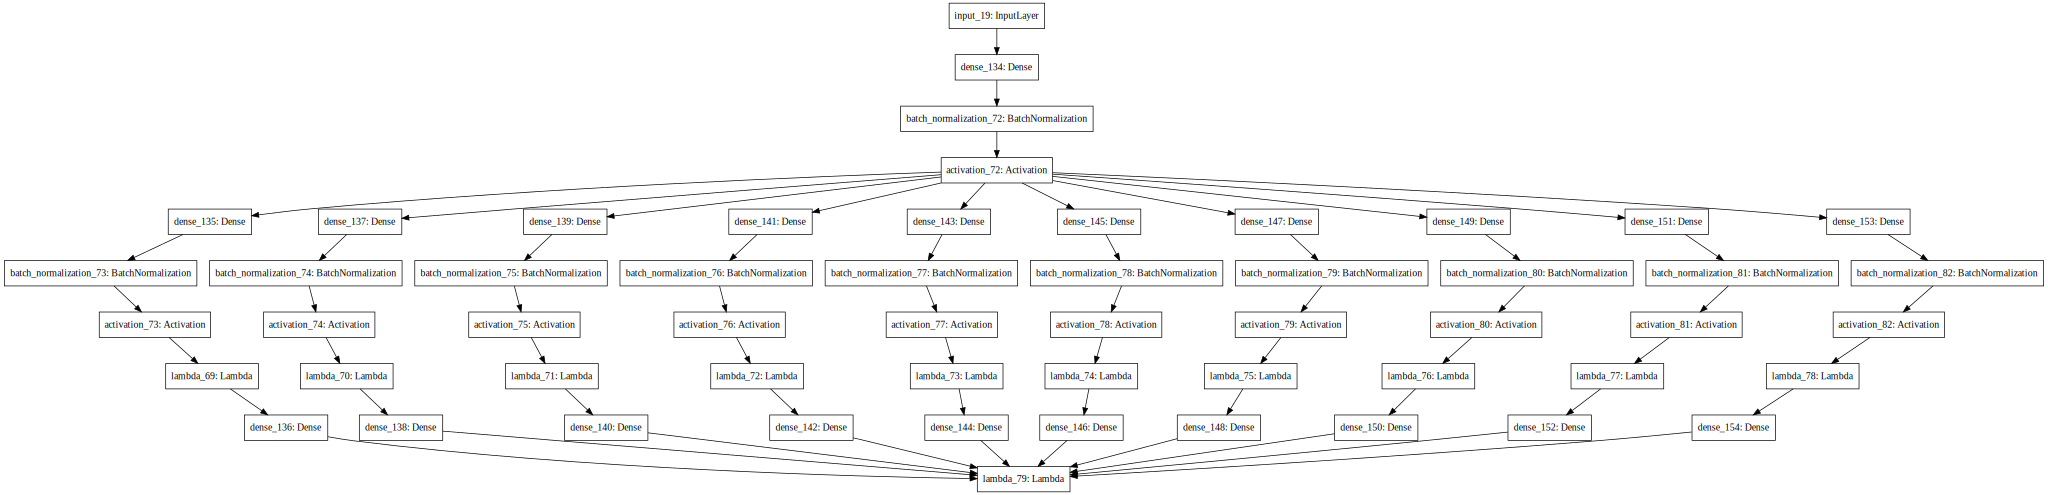

In [33]:
from keras.utils.vis_utils import model_to_dot 
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [35]:
model.fit(df.loc[:,[i for i in range(1,101)]]*100,df.loc[:,[i for i in range(1,101)]]*100nb_epoch =100, batch_size=1000)

Epoch 1/100
  6000/399846 [..............................] - ETA: 11s - loss: 14.8385

/Users/tomohiromimura/.pyenv/versions/3.6.4/envs/normal/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


399846/399846 [==============================] - 8s 20us/step - loss: 10.2715
Epoch 2/100
399846/399846 [==============================] - 8s 20us/step - loss: 8.8684
Epoch 3/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.5964
Epoch 4/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.4523
Epoch 5/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.3558
Epoch 6/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.2866
Epoch 7/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.2354
Epoch 8/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.1953
Epoch 9/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.1649
Epoch 10/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.1402
Epoch 11/100
399846/399846 [==============================] - 8s 21us/step - loss: 8.1208
Epoch 12/100
399846/399846 [==

399846/399846 [==============================] - 8s 20us/step - loss: 7.9460
Epoch 93/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9463
Epoch 94/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9463
Epoch 95/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9451
Epoch 96/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9442
Epoch 97/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9440
Epoch 98/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9437
Epoch 99/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9431
Epoch 100/100
399846/399846 [==============================] - 8s 20us/step - loss: 7.9427


In [53]:
def result_vec(name):
    resutl = []
    resutl.append(model_0.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_1.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_2.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_3.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_4.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_5.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_6.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_7.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_8.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    resutl.append(model_9.predict(df[df[0]==name].loc[:,[i for i in range(1,101)]]*10).argmax())
    return np.array(resutl)

In [55]:
result_vec('man')-result_vec('woman')

array([ 0,  6, -2,  0,  2,  6,  0, -2,  0,  0])

In [56]:
result_vec('king')-result_vec('queen') 

array([ 0,  6, -2,  1,  0,  1, -3,  0,  6,  0])

In [57]:
result_vec('uncle')-result_vec('aunt') 

array([ 0,  0,  0,  1, -3,  0, -2,  0,  0,  0])